In [9]:
import warnings

import bionty as bt
import lamindb as ln
import spatialdata as sd
import spatialdata_plot

warnings.filterwarnings("ignore")

# Pre-defined collections

You can find different types of small data collections with two to eight datasets that bundle Artifacts.

Examples are:
- `Xenium Human Bone and Bone Marrow Data with Custom Add-on Panel` - disease and control data

- `Fresh Frozen Healthy Mouse Brain, 3 Replicates` - replicates of the same experiment

- `Mouse Brain, 3 Space Ranger Versions` - the same sample analysed with different Space Ranger versions

- `Human Glioblastoma, Targeted and Whole Transcriptome Panels` - the same condition monitored with different gene panels

You can find all collections at: [Lamin Collections](https://lamin.ai/scverse/spatialdata-db/collections?filter[and][0][or][0][_branch_code][eq]=1&filter[and][1][or][0][is_latest][eq]=true)

Clicking at the `copy` button on the left of the collection name, will copy the code that retrieves the collection.

In [10]:
human_hyperplasia = ln.Collection.get("m8jG2H2kyAfa3dSI0000")

In [23]:
human_hyperplasia

Collection(uid='m8jG2H2kyAfa3dSI0000', is_latest=True, key='Xenium Human Follicular Hyperplasia', hash='SusbUAuNhZjR5vozq44NbA', created_by_id=8, space_id=1, run_id=291, created_at=2025-03-12 06:17:10 UTC)

In [24]:
human_hyperplasia.artifacts.df(include=["otype"])

! no run & transform got linked, call `ln.track()` & re-run
! run input wasn't tracked, call `ln.track()` and re-run


,uid,key,description,otype
id,,,,
421,N0xENJfC99dVgaga0000,None,Xenium Human Tonsil (Reactive follicular hyper...,spatialdata
422,s5e1uTgQFw54ymJW0000,None,Xenium Human Tonsil (Follicular lymphoid hyper...,spatialdata


There are two ways to download all artifacts of the collection:
1) using `collection.cache()` - which caches all artifacts and returns the path to the local datasets
2) iteratively download each artifact to a specific path:
```python
    for artifact in human_hyperplasia.artifacts:
        artifact.path.download_to(...)

In [6]:
human_hyperplasia.cache()

... synchronizing N0xENJfC99dVgaga.zarr: 100.0%
! run input wasn't tracked, call `ln.track()` and re-run
... synchronizing s5e1uTgQFw54ymJW.zarr: 100.0%
! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run


[PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/N0xENJfC99dVgaga.zarr'),
 PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/s5e1uTgQFw54ymJW.zarr')]

In [11]:
sdata = sd.read_zarr(
    "/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/N0xENJfC99dVgaga.zarr"
)
sdata

SpatialData object, with associated Zarr store: /ictstr01/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/N0xENJfC99dVgaga.zarr
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 40869, 53926), (1, 20434, 26963), (1, 10217, 13481), (1, 5108, 6740), (1, 2554, 3370)
│     └── 'morphology_mip': DataTree[cyx] (1, 40869, 53926), (1, 20434, 26963), (1, 10217, 13481), (1, 5108, 6740), (1, 2554, 3370)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (40869, 53926), (20434, 26963), (10217, 13481), (5108, 6740), (2554, 3370)
│     └── 'nucleus_labels': DataTree[yx] (40869, 53926), (20434, 26963), (10217, 13481), (5108, 6740), (2554, 3370)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (1349620, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (1349620, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (1349620, 1) (2D shapes)
└── Tab

INFO     Rasterizing image for faster rendering.                                                                   
INFO     Rasterizing image for faster rendering.                                                                   


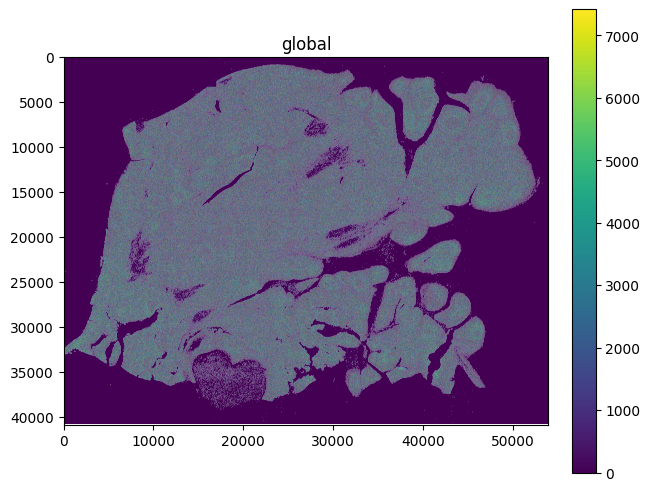

In [14]:
(
    sdata
    .pl.render_images(elements="morphology_focus")
    .pl.render_labels(elements="nucleus_labels")
    .pl.show("global")
)